
Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


In [ ]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")
ha.head()

,age,sex,cp,trtbps,chol,restecg,thalach,output
0,63,1,3,145,233,0,150,1
1,37,1,2,130,250,1,187,1
2,56,1,1,120,236,1,178,1
3,57,0,0,120,354,1,163,1
4,57,1,0,140,192,1,148,1


## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


KNN


In [ ]:
X = ha.drop('cp', axis=1)
y = ha['cp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {round(accuracy_knn, 2)}")


KNN Accuracy: 0.42


Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {round(accuracy_dt,2)}")


Decision Tree Accuracy: 0.33


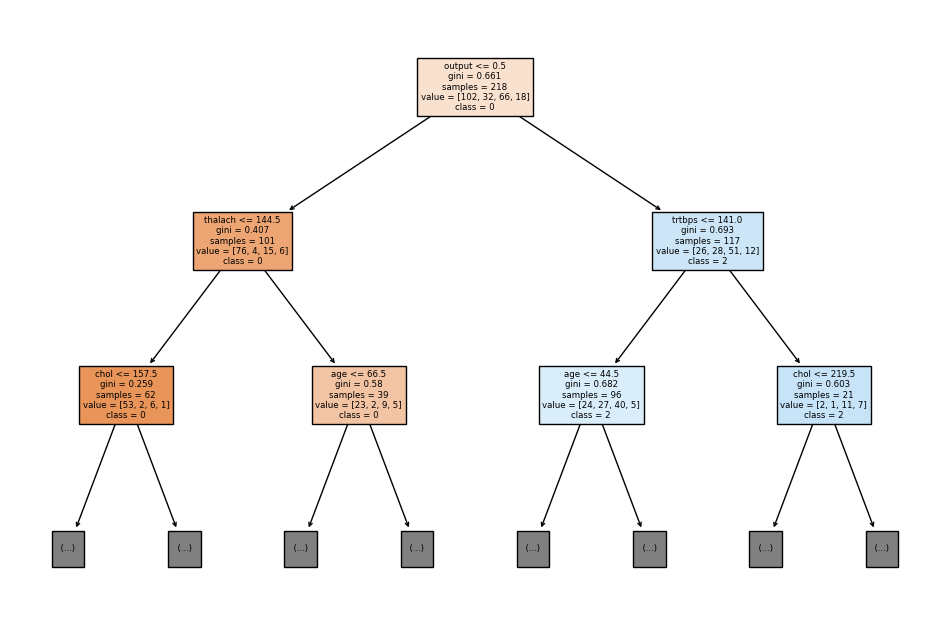

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['0', '1', '2', '3'], max_depth = 2)
plt.show()

The root node in this decision tree is output which is the variable for the doctor's diagnosis. If the doctor diagnoses the patient as bein g at right (1) then it looks to the resting blood pressure (trtbps) variable. If the value of that is less than or equal to 141 then it looks at age otherwise it looks at the cholesterol variable next. If the patient is not diagnosed as being at risk, the decision tree next looks at the maximum heart rate achieved during exercise (thalach) variable. If that values is less than or equal to 144.5 it looks to cholesterol and otherwise age.  

LDA

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)


accuracy_lda = accuracy_score(y_test, y_pred_lda)
print(f"LDA Accuracy: {round(accuracy_lda, 2)}")


LDA Accuracy: 0.55


## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [ ]:
ha['cp_is_3'] = (ha['cp'] == 3).astype(int)
print(ha.head())


   age  sex  cp  trtbps  chol  restecg  thalach  output  cp_is_3
0   63    1   3     145   233        0      150       1        1
1   37    1   2     130   250        1      187       1        0
2   56    1   1     120   236        1      178       1        0
3   57    0   0     120   354        1      163       1        0
4   57    1   0     140   192        1      148       1        0


In [ ]:
#X = ha.drop(['cp', 'cp_is_3'], axis=1)
#y = ha['cp_is_3']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#log_reg = LogisticRegression(solver='liblinear', max_iter=2000, random_state=42)
#log_reg.fit(X_train, y_train)
#y_pred_log_reg = log_reg.predict(X_test)

#f1 = f1_score(y_test, y_pred_log_reg)
#print(f"Logistic Regression F1 Score: {f1}")


In [ ]:
# Creating separate columns for each category using One-vs-Rest approach
for i in range(4):
    ha[f'cp_is_{i}'] = (ha['cp'] == i).astype(int)

f1_scores = []
for i in range(4):
    X = ha.drop([f'cp', f'cp_is_{i}'], axis=1)
    y = ha[f'cp_is_{i}']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    log_reg = LogisticRegression(solver='saga', max_iter=1000, random_state=42)
    log_reg.fit(X_train, y_train)

    y_pred = log_reg.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)
    print(f"F1 Score for category {i}: {f1}")

best_category = f1_scores.index(max(f1_scores))
print(f"The best OvR category {best_category}.")


F1 Score for category 0: 0.7142857142857142
F1 Score for category 1: 0.0
F1 Score for category 2: 0.0
F1 Score for category 3: 0.0
The best OvR category 0.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [ ]:
reduced_ha = ha[ha['cp'].isin([0, 1])]
print(reduced_ha.head())

   age  sex  cp  trtbps  chol  restecg  thalach  output  cp_is_3  cp_is_0  \
2   56    1   1     120   236        1      178       1        0        0   
3   57    0   0     120   354        1      163       1        0        1   
4   57    1   0     140   192        1      148       1        0        1   
5   56    0   1     140   294        0      153       1        0        0   
6   44    1   1     120   263        1      173       1        0        0   

   cp_is_1  cp_is_2  
2        1        0  
3        0        0  
4        0        0  
5        1        0  
6        1        0  


In [ ]:
X_reduced = reduced_ha.drop(['cp', 'cp_is_3', 'cp_is_0', 'cp_is_1', 'cp_is_2'], axis=1)
y_reduced = reduced_ha['cp']

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

log_reg_reduced = LogisticRegression(solver='liblinear', random_state=42)
log_reg_reduced.fit(X_train_red, y_train_red)
y_pred_proba = log_reg_reduced.predict_proba(X_test_red)[:, 1]

roc_auc = roc_auc_score(y_test_red, y_pred_proba)
print(f"ROC-AUC Score: {round(roc_auc, 2)}")

ROC-AUC Score: 0.71


In [ ]:
category_pairs = [(0, 2), (0, 3)]

for pair in category_pairs:
    reduced_ha_pair = ha[ha['cp'].isin(pair)]

    X_pair = reduced_ha_pair.drop(['cp', 'cp_is_3', 'cp_is_0', 'cp_is_1', 'cp_is_2'], axis=1)
    y_pair = reduced_ha_pair['cp']

    X_train_pair, X_test_pair, y_train_pair, y_test_pair = train_test_split(X_pair, y_pair, test_size=0.2, random_state=42)

    log_reg_pair = LogisticRegression(solver='liblinear', random_state=42)
    log_reg_pair.fit(X_train_pair, y_train_pair)

    y_pred_proba_pair = log_reg_pair.predict_proba(X_test_pair)[:, 1]  # Predict probabilities for positive class

    roc_auc_pair = roc_auc_score(y_test_pair, y_pred_proba_pair)
    print(f"ROC-AUC Score for {pair[0]} vs {pair[1]}: {roc_auc_pair}")


ROC-AUC Score for 0 vs 2: 0.7857142857142857
ROC-AUC Score for 0 vs 3: 0.7142857142857142


The pair the OvO approach best at distinguishing was cp of 0 vs 2 with a ROC-AUC Score of 0.786.